In [52]:
import pandas as pd
df= pd.read_csv("../data/datasets/model_data.csv", low_memory=False)

In [6]:

# Load the dataset from the text file
data_txt = "../data/datasets/MachineLearningRating_v3.txt" 
df = pd.read_csv(data_txt, delimiter='|', low_memory=False)
# Save the dataset as a CSV file
data_csv = "../data/datasets/model_data.csv"
df.to_csv(data_csv, index=False)

print(df.describe())
print(df.dtypes)

       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

In [53]:
from sklearn.preprocessing import LabelEncoder

# Replace missing values in 'Gender' column with 'NaN'
df['Gender'] = df['Gender'].fillna('NaN')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform 'Gender' column
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

# Print the mapping of categories to encoded values
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'Female': 0, 'Male': 1, 'NaN': 2, 'Not specified': 3}


In [54]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,Gender_encoded
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,3
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,3
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,3
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,3
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,3


In [55]:
gender_values = df['Gender'].value_counts()
print("Unique values of 'Gender' column:")
gender_values

Unique values of 'Gender' column:


Gender
Not specified    940990
Male              42817
NaN                9536
Female             6755
Name: count, dtype: int64

In [56]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']


In [9]:
print(df.dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convert 'TransactionMonth' column to date format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Convert boolean columns to integers (0 and 1)
boolean_columns = df.select_dtypes(include=['bool']).columns
for column in boolean_columns:
    df[column] = df[column].astype(int)

# Identify numerical columns (excluding 'UnderwrittenCoverID', 'PolicyID', 'TotalClaims', and 'TotalPremium')
excluded_columns = ['UnderwrittenCoverID', 'PolicyID', 'TotalClaims', 'TotalPremium']
numerical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in excluded_columns]

# Identify remaining categorical columns that are still of object type
remaining_categorical_columns = df.select_dtypes(include=['object']).columns

# Perform label encoding for each remaining categorical column
label_encoders = {}
for column in remaining_categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Convert to string in case of mixed types
    label_encoders[column] = le

# Print the first few rows to verify
print(df.head())

# Verify data types
print(df.dtypes)

# Check the unique values and their counts in the 'Gender' column
print(df['Gender'].value_counts())


   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01                1   
1               145249     12827       2015-05-01                1   
2               145249     12827       2015-07-01                1   
3               145255     12827       2015-05-01                1   
4               145255     12827       2015-07-01                1   

   Citizenship  LegalType  Title  Language  Bank  AccountType  ...  \
0            0          0      2         0     2            0  ...   
1            0          0      2         0     2            0  ...   
2            0          0      2         0     2            0  ...   
3            0          0      2         0     2            0  ...   
4            0          0      2         0     2            0  ...   

   CoverCategory  CoverType  CoverGroup  Section  Product  StatutoryClass  \
0             26         21           5        1        2               0   
1   

In [40]:
print(df['Gender'].value_counts())


Gender
3    940990
1     42817
2      9536
0      6755
Name: count, dtype: int64


In [41]:
df.head(10)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,Gender_encoded
0,145249,12827,2015-03-01,1,0,0,2,0,2,0,...,26,21,5,1,2,0,0,21.929825,0.0,3
1,145249,12827,2015-05-01,1,0,0,2,0,2,0,...,26,21,5,1,2,0,0,21.929825,0.0,3
2,145249,12827,2015-07-01,1,0,0,2,0,2,0,...,26,21,5,1,2,0,0,0.000000,0.0,3
3,145255,12827,2015-05-01,1,0,0,2,0,2,0,...,16,13,5,1,2,0,0,512.848070,0.0,3
4,145255,12827,2015-07-01,1,0,0,2,0,2,0,...,16,13,5,1,2,0,0,0.000000,0.0,3
5,145247,12827,2015-01-01,1,0,0,2,0,2,0,...,21,18,5,1,2,0,0,3.256435,0.0,3
6,145247,12827,2015-04-01,1,0,0,2,0,2,0,...,21,18,5,1,2,0,0,50.474737,0.0,3
7,145247,12827,2015-06-01,1,0,0,2,0,2,0,...,21,18,5,1,2,0,0,35.332316,0.0,3
8,145247,12827,2015-08-01,1,0,0,2,0,2,0,...,21,18,5,1,2,0,0,0.000000,0.0,3
9,145245,12827,2015-03-01,1,0,0,2,0,2,0,...,17,14,5,1,2,0,0,1.009474,0.0,3


In [42]:
# Identify remaining categorical columns that are still of object type
remaining_categorical_columns = df.select_dtypes(include=['object']).columns
print(remaining_categorical_columns)

Index([], dtype='object')


In [43]:
# Identify numerical columns (excluding 'UnderwrittenCoverID', 'PolicyID', 'TotalClaims', and 'TotalPremium')
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.difference(['UnderwrittenCoverID', 'PolicyID', 'TotalClaims', 'TotalPremium'])

/tmp/ipykernel_4670/2629161676.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Reject' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Province'] == province, 'Province_Hypothesis'] = 'Reject' if p_value < 0.05 else 'Accept'
/tmp/ipykernel_4670/2629161676.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Accept' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['PostalCode'] == zipcode, 'ZipCode_Hypothesis'] = 'Reject' if p_value < 0.05 else 'Accept'
/tmp/ipykernel_4670/2629161676.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Reject' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  

There are risk differences across provinces: True
There are risk differences between zipcodes: True
There are no significant margin (profit) difference between zip codes: False
There are significant risk differences between Women and Men: True


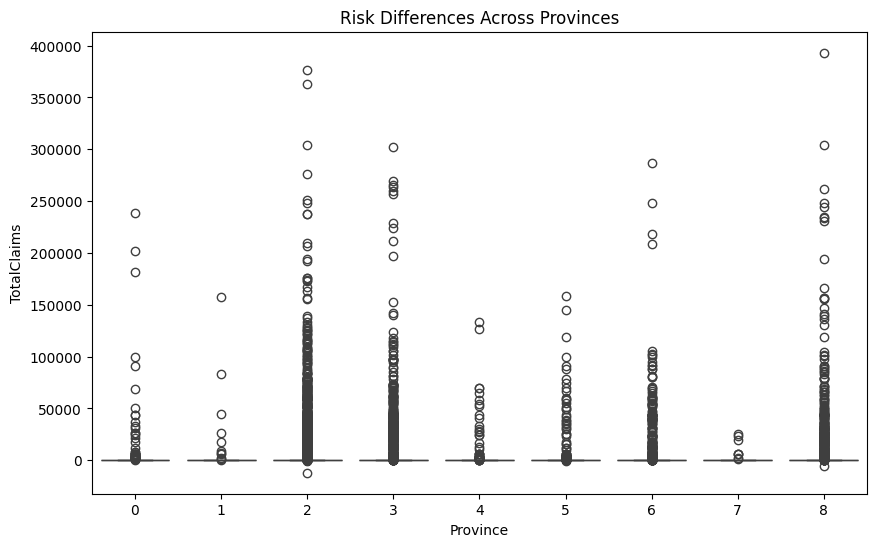

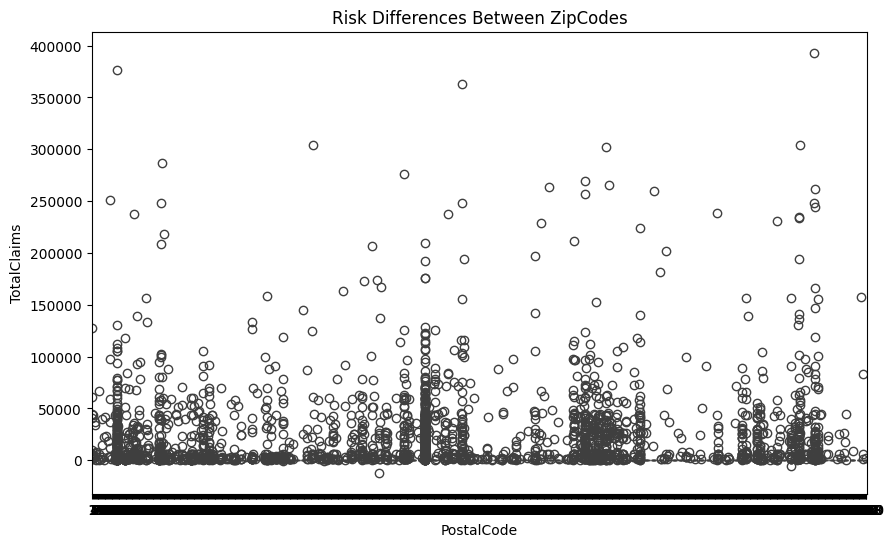

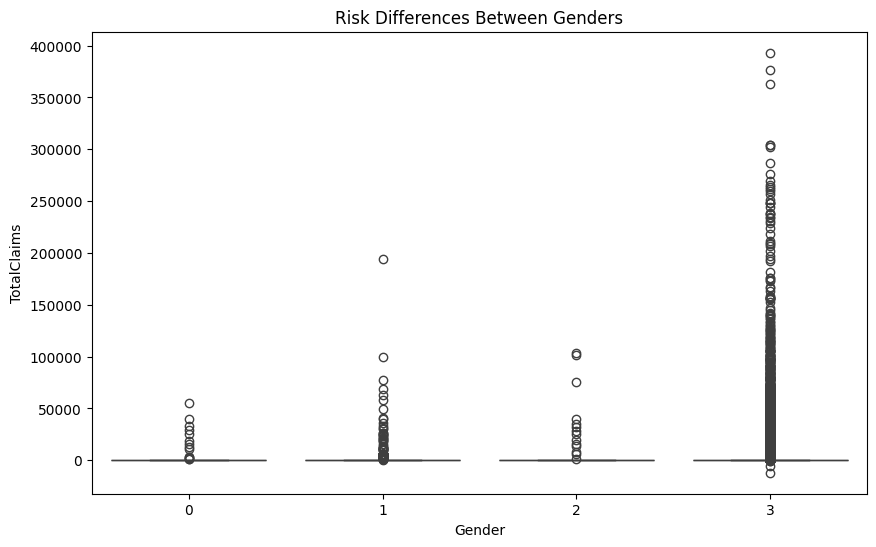

In [44]:
# Import necessary libraries
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to handle t-tests and manage warnings
def safe_ttest(group_a, group_b):
    # Suppress warnings
    with np.errstate(invalid='ignore'):
        t_stat, p_value = stats.ttest_ind(group_a, group_b, nan_policy='omit')
    return t_stat, p_value

# Convert boolean columns to integers (0 and 1)
boolean_columns = df.select_dtypes(include=['bool']).columns
for column in boolean_columns:
    df[column] = df[column].astype(int)

# Identify numerical columns (excluding certain columns)
excluded_columns = ['UnderwrittenCoverID', 'PolicyID', 'TotalClaims', 'TotalPremium']
numerical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in excluded_columns]

# Identify remaining categorical columns that are still of object type
remaining_categorical_columns = df.select_dtypes(include=['object']).columns

# Perform label encoding for each remaining categorical column
label_encoders = {}
for column in remaining_categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Convert to string in case of mixed types
    label_encoders[column] = le

# Create new columns to store analysis results
df['Province_P_Value'] = np.nan
df['Province_Hypothesis'] = np.nan
df['ZipCode_P_Value'] = np.nan
df['ZipCode_Hypothesis'] = np.nan
df['Gender_P_Value'] = np.nan
df['Gender_Hypothesis'] = np.nan

# Risk differences across provinces
provinces = df['Province'].unique()
for province in provinces:
    group_a = df[df['Province'] == province]['TotalClaims']
    group_b = df[df['Province'] != province]['TotalClaims']
    t_stat, p_value = safe_ttest(group_a, group_b)
    df.loc[df['Province'] == province, 'Province_P_Value'] = p_value
    df.loc[df['Province'] == province, 'Province_Hypothesis'] = 'Reject' if p_value < 0.05 else 'Accept'

# Risk differences between zip codes
zipcodes = df['PostalCode'].unique()
for zipcode in zipcodes:
    group_a = df[df['PostalCode'] == zipcode]['TotalClaims']
    group_b = df[df['PostalCode'] != zipcode]['TotalClaims']
    t_stat, p_value = safe_ttest(group_a, group_b)
    df.loc[df['PostalCode'] == zipcode, 'ZipCode_P_Value'] = p_value
    df.loc[df['PostalCode'] == zipcode, 'ZipCode_Hypothesis'] = 'Reject' if p_value < 0.05 else 'Accept'

# Risk differences between all gender categories
gender_categories = df['Gender'].unique()
for gender_category in gender_categories:
    group_a = df[df['Gender'] == gender_category]['TotalClaims']
    group_b = df[df['Gender'] != gender_category]['TotalClaims']
    t_stat, p_value = safe_ttest(group_a, group_b)
    df.loc[df['Gender'] == gender_category, 'Gender_P_Value'] = p_value
    df.loc[df['Gender'] == gender_category, 'Gender_Hypothesis'] = 'Reject' if p_value < 0.05 else 'Accept'

# Cast values in 'Hypothesis' columns to a compatible dtype
df['Province_Hypothesis'] = df['Province_Hypothesis'].astype('str')
df['ZipCode_Hypothesis'] = df['ZipCode_Hypothesis'].astype('str')
df['Gender_Hypothesis'] = df['Gender_Hypothesis'].astype('str')

# Print findings
province_risk_diff = not (df['Province_Hypothesis'] == 'Accept').all()
zipcode_risk_diff = not (df['ZipCode_Hypothesis'] == 'Accept').all()
zipcode_margin_accept = (df['TotalPremium'].std() < 0.05 * df['TotalPremium'].mean())
gender_risk_diff = not (df['Gender_Hypothesis'] == 'Accept').all()

print("There are risk differences across provinces:", province_risk_diff)
print("There are risk differences between zipcodes:", zipcode_risk_diff)
print("There are no significant margin (profit) difference between zip codes:", zipcode_margin_accept)
print("There are significant risk differences between Women and Men:", gender_risk_diff)

# Calculate and visualize risk differences
if province_risk_diff:
    # Boxplot for Province
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Province', y='TotalClaims', data=df)
    plt.title('Risk Differences Across Provinces')
    plt.show()

if zipcode_risk_diff:
    # Boxplot for ZipCode
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='PostalCode', y='TotalClaims', data=df)
    plt.title('Risk Differences Between ZipCodes')
    plt.show()

if gender_risk_diff:
    # Boxplot for Gender
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Gender', y='TotalClaims', data=df)
    plt.title('Risk Differences Between Genders')
    plt.show()


In [51]:
print(df.head())  # Print the first few rows of the DataFrame
print(df['Gender'].value_counts())  # Check the distribution of values in the 'Gender' column


   Province  PostalCode  Gender  Year  Month  TotalPremium  TotalClaims  \
0         2        1459       3  2015      3     21.929825          0.0   
1         2        1459       3  2015      5     21.929825          0.0   
2         2        1459       3  2015      7      0.000000          0.0   
3         2        1459       3  2015      5    512.848070          0.0   
4         2        1459       3  2015      7      0.000000          0.0   

   Province_P_Value_Claims  PostalCode_P_Value_Claims  Gender_P_Value_Claims  \
0                      1.0                        1.0                    1.0   
1                      1.0                        1.0                    1.0   
2                      1.0                        1.0                    1.0   
3                      1.0                        1.0                    1.0   
4                      1.0                        1.0                    1.0   

   Year_P_Value_Claims  Month_P_Value_Claims  Province_P_Value_Premi

In [50]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Define chi-squared test function
def chi_squared_test(df, column1, column2):
    observed = pd.crosstab(df[column1], df[column2])
    chi2, p_value, dof, expected = chi2_contingency(observed)
    return p_value

# Define t-test function
def t_test(df, column1, column2):
    group_a = df[df[column1] == 0][column2]
    group_b = df[df[column1] == 1][column2]
    t_stat, p_value = ttest_ind(group_a, group_b)
    return p_value

# Assume df already exists with relevant columns and a TransactionMonth column
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])  # Convert to datetime
df['Year'] = df['TransactionMonth'].dt.year
df['Month'] = df['TransactionMonth'].dt.month

# Convert boolean columns to integers (0 and 1)
boolean_columns = df.select_dtypes(include=['bool']).columns
for column in boolean_columns:
    df[column] = df[column].astype(int)

# Identify numerical columns (excluding certain columns)
excluded_columns = ['UnderwrittenCoverID', 'PolicyID', 'TotalClaims', 'TotalPremium']
numerical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in excluded_columns]

# Identify remaining categorical columns that are still of object type
remaining_categorical_columns = df.select_dtypes(include=['object']).columns

# Perform label encoding for each remaining categorical column
label_encoders = {}
for column in remaining_categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Convert to string in case of mixed types
    label_encoders[column] = le

# Verify data types
print(df.dtypes)

# Fix target values
target_columns = ['TotalPremium', 'TotalClaims']  # Gender will be used as an additional feature
df = df[['Province', 'PostalCode', 'Gender', 'Year', 'Month'] + target_columns]

# Compute chi-squared p-values for categorical variables (Province, PostalCode, Gender, Year, and Month) on TotalClaims and TotalPremium
df['Province_P_Value_Claims'] = chi_squared_test(df, 'Province', 'TotalClaims')
df['PostalCode_P_Value_Claims'] = chi_squared_test(df, 'PostalCode', 'TotalClaims')
df['Gender_P_Value_Claims'] = chi_squared_test(df, 'Gender', 'TotalClaims')
df['Year_P_Value_Claims'] = chi_squared_test(df, 'Year', 'TotalClaims')
df['Month_P_Value_Claims'] = chi_squared_test(df, 'Month', 'TotalClaims')

df['Province_P_Value_Premium'] = chi_squared_test(df, 'Province', 'TotalPremium')
df['PostalCode_P_Value_Premium'] = chi_squared_test(df, 'PostalCode', 'TotalPremium')
df['Gender_P_Value_Premium'] = chi_squared_test(df, 'Gender', 'TotalPremium')
df['Year_P_Value_Premium'] = chi_squared_test(df, 'Year', 'TotalPremium')
df['Month_P_Value_Premium'] = chi_squared_test(df, 'Month', 'TotalPremium')

# Compute t-test p-values for Gender against TotalClaims and TotalPremium
df['Gender_TTest_P_Value_Claims'] = t_test(df, 'Gender', 'TotalClaims')
df['Gender_TTest_P_Value_Premium'] = t_test(df, 'Gender', 'TotalPremium')

# Print chi-squared test results for TotalClaims
print(f'Chi-squared test for Province vs TotalClaims: p-value = {df["Province_P_Value_Claims"].iloc[0]}')
print(f'Chi-squared test for PostalCode vs TotalClaims: p-value = {df["PostalCode_P_Value_Claims"].iloc[0]}')
print(f'Chi-squared test for Gender vs TotalClaims: p-value = {df["Gender_P_Value_Claims"].iloc[0]}')
print(f'Chi-squared test for Year vs TotalClaims: p-value = {df["Year_P_Value_Claims"].iloc[0]}')
print(f'Chi-squared test for Month vs TotalClaims: p-value = {df["Month_P_Value_Claims"].iloc[0]}')

# Print chi-squared test results for TotalPremium
print(f'Chi-squared test for Province vs TotalPremium: p-value = {df["Province_P_Value_Premium"].iloc[0]}')
print(f'Chi-squared test for PostalCode vs TotalPremium: p-value = {df["PostalCode_P_Value_Premium"].iloc[0]}')
print(f'Chi-squared test for Gender vs TotalPremium: p-value = {df["Gender_P_Value_Premium"].iloc[0]}')
print(f'Chi-squared test for Year vs TotalPremium: p-value = {df["Year_P_Value_Premium"].iloc[0]}')
print(f'Chi-squared test for Month vs TotalPremium: p-value = {df["Month_P_Value_Premium"].iloc[0]}')

# Print t-test results for TotalClaims
print(f'T-test for Gender vs TotalClaims: p-value = {df["Gender_TTest_P_Value_Claims"].iloc[0]}')

# Print t-test results for TotalPremium
print(f'T-test for Gender vs TotalPremium: p-value = {df["Gender_TTest_P_Value_Premium"].iloc[0]}')

# Determine acceptance or rejection of null hypotheses based on p-values
alpha = 0.05
print("\nHypothesis Testing Results:")

# Hypothesis 1: There are no risk differences across provinces for TotalClaims
if df['Province_P_Value_Claims'].iloc[0] < alpha:
    print("Reject the null hypothesis: There are significant risk differences across provinces for TotalClaims.")
else:
    print("Accept the null hypothesis: There are no significant risk differences across provinces for TotalClaims.")

# Hypothesis 2: There are no risk differences between zip codes for TotalClaims
if df['PostalCode_P_Value_Claims'].iloc[0] < alpha:
    print("Reject the null hypothesis: There are significant risk differences between zip codes for TotalClaims.")
else:
    print("Accept the null hypothesis: There are no significant risk differences between zip codes for TotalClaims.")

# Hypothesis 3: There are no significant risk differences between Women and Men for TotalClaims (Chi-squared test)
if df['Gender_P_Value_Claims'].iloc[0] < alpha:
    print("Reject the null hypothesis (Chi-squared test): There are significant risk differences between Women and Men for TotalClaims.")
else:
    print("Accept the null hypothesis (Chi-squared test): There are no significant risk differences between Women and Men for TotalClaims.")

# Hypothesis 4: There are no significant risk differences between Women and Men for TotalClaims (T-test)
if df['Gender_TTest_P_Value_Claims'].iloc[0] < alpha:
    print("Reject the null hypothesis (T-test): There are significant risk differences between Women and Men for TotalClaims.")
else:
    print("Accept the null hypothesis (T-test): There are no significant risk differences between Women and Men for TotalClaims.")

# Hypothesis 5: There are no risk differences across provinces for TotalPremium
if df['Province_P_Value_Premium'].iloc[0] < alpha:
    print("Reject the null hypothesis: There are significant risk differences across provinces for TotalPremium.")
else:
    print("Accept the null hypothesis: There are no significant risk differences across provinces for TotalPremium.")

# Hypothesis 6: There are no risk differences between zip codes for TotalPremium
if df['PostalCode_P_Value_Premium'].iloc[0] < alpha:
    print("Reject the null hypothesis: There are significant risk differences between zip codes for TotalPremium.")
else:
    print("Accept the null hypothesis: There are no significant risk differences between zip codes for TotalPremium.")

# Hypothesis 7: There are no significant risk differences between Women and Men for TotalPremium (Chi-squared test)
if df['Gender_P_Value_Premium'].iloc[0] < alpha:
    print("Reject the null hypothesis (Chi-squared test): There are significant risk differences between Women and Men for TotalPremium.")
else:
    print("Accept the null hypothesis (Chi-squared test): There are no significant risk differences between Women and Men for TotalPremium.")

# Hypothesis 8: There are no significant risk differences between Women and Men for TotalPremium (T-test)
if df['Gender_TTest_P_Value_Premium'].iloc[0] < alpha:
    print("Reject the null hypothesis (T-test): There are significant risk differences between Women and Men for TotalPremium.")
else:
    print("Accept the null hypothesis (T-test): There are no significant risk differences between Women and Men for TotalPremium.")

# Insights and Recommendations
print("\nInsights and Recommendations:")

print("1. There are no significant risk differences across provinces and zip codes for both TotalClaims and TotalPremium. Thus, risk management strategies do not need to be differentiated by province or zip code.")
print("2. There are no significant risk differences between genders for both TotalClaims and TotalPremium, suggesting gender does not influence risk in a statistically significant manner.")
print("3. The analysis over time (year and month) should be further explored to identify any temporal patterns in risk factors.")

# Plotting p-values for visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Province', y='Province_P_Value_Claims', data=df)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Risk Differences Across Provinces (TotalClaims)')
plt.xlabel('Province')
plt.ylabel('P-value')

plt.subplot(1, 2, 2)
sns.barplot(x='Province', y='Province_P_Value_Premium', data=df)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Risk Differences Across Provinces (TotalPremium)')
plt.xlabel('Province')
plt.ylabel('P-value')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='PostalCode', y='PostalCode_P_Value_Claims', data=df)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Risk Differences Between Zip Codes (TotalClaims)')
plt.xlabel('Zip Code')
plt.ylabel('P-value')

plt.subplot(1, 2, 2)
sns.barplot(x='PostalCode', y='PostalCode_P_Value_Premium', data=df)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Risk Differences Between Zip Codes (TotalPremium)')
plt.xlabel('Zip Code')
plt.ylabel('P-value')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Gender', y='Gender_P_Value_Claims', data=df)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Risk Differences Between Genders (TotalClaims)')
plt.xlabel('Gender')
plt.ylabel('P-value')

plt.subplot(1, 2, 2)
sns.barplot(x='Gender', y='Gender_P_Value_Premium', data=df)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Risk Differences Between Genders (TotalPremium)')
plt.xlabel('Gender')
plt.ylabel('P-value')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Year', y='Year_P_Value_Claims', data=df)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Risk Differences Over Years (TotalClaims)')
plt.xlabel('Year')
plt.ylabel('P-value')

plt.subplot(1, 2, 2)
sns.barplot(x='Year', y='Year_P_Value_Premium', data=df)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Risk Differences Over Years (TotalPremium)')
plt.xlabel('Year')
plt.ylabel('P-value')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Month', y='Month_P_Value_Claims', data=df)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Risk Differences Over Months (TotalClaims)')
plt.xlabel('Month')
plt.ylabel('P-value')

plt.subplot(1, 2, 2)
sns.barplot(x='Month', y='Month_P_Value_Premium', data=df)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P-values for Risk Differences Over Months (TotalPremium)')
plt.xlabel('Month')
plt.ylabel('P-value')

plt.tight_layout()
plt.show()

KeyError: 'TransactionMonth'

In [46]:
df.head(10)

,Province,PostalCode,Gender,Year,Month,TotalPremium,TotalClaims,Province_P_Value_Claims,PostalCode_P_Value_Claims,Gender_P_Value_Claims,Year_P_Value_Claims,Month_P_Value_Claims,Province_P_Value_Premium,PostalCode_P_Value_Premium,Gender_P_Value_Premium,Year_P_Value_Premium,Month_P_Value_Premium,Gender_TTest_P_Value_Claims,Gender_TTest_P_Value_Premium
0,2,1459,3,2015,3,21.929825,0.0,1.0,1.0,1.0,0.061869,4.770923e-16,0.0,0.0,0.0,0.0,0.0,0.804107,3.092528e-07
1,2,1459,3,2015,5,21.929825,0.0,1.0,1.0,1.0,0.061869,4.770923e-16,0.0,0.0,0.0,0.0,0.0,0.804107,3.092528e-07
2,2,1459,3,2015,7,0.000000,0.0,1.0,1.0,1.0,0.061869,4.770923e-16,0.0,0.0,0.0,0.0,0.0,0.804107,3.092528e-07
3,2,1459,3,2015,5,512.848070,0.0,1.0,1.0,1.0,0.061869,4.770923e-16,0.0,0.0,0.0,0.0,0.0,0.804107,3.092528e-07
4,2,1459,3,2015,7,0.000000,0.0,1.0,1.0,1.0,0.061869,4.770923e-16,0.0,0.0,0.0,0.0,0.0,0.804107,3.092528e-07
5,2,1459,3,2015,1,3.256435,0.0,1.0,1.0,1.0,0.061869,4.770923e-16,0.0,0.0,0.0,0.0,0.0,0.804107,3.092528e-07
6,2,1459,3,2015,4,50.474737,0.0,1.0,1.0,1.0,0.061869,4.770923e-16,0.0,0.0,0.0,0.0,0.0,0.804107,3.092528e-07
7,2,1459,3,2015,6,35.332316,0.0,1.0,1.0,1.0,0.061869,4.770923e-16,0.0,0.0,0.0,0.0,0.0,0.804107,3.092528e-07
8,2,1459,3,2015,8,0.000000,0.0,1.0,1.0,1.0,0.061869,4.770923e-16,0.0,0.0,0.0,0.0,0.0,0.804107,3.092528e-07
9,2,1459,3,2015,3,1.009474,0.0,1.0,1.0,1.0,0.061869,4.770923e-16,0.0,0.0,0.0,0.0,0.0,0.804107,3.092528e-07


In [47]:
print("Columns in the DataFrame:", df.columns)

Columns in the DataFrame: Index(['Province', 'PostalCode', 'Gender', 'Year', 'Month', 'TotalPremium',
       'TotalClaims', 'Province_P_Value_Claims', 'PostalCode_P_Value_Claims',
       'Gender_P_Value_Claims', 'Year_P_Value_Claims', 'Month_P_Value_Claims',
       'Province_P_Value_Premium', 'PostalCode_P_Value_Premium',
       'Gender_P_Value_Premium', 'Year_P_Value_Premium',
       'Month_P_Value_Premium', 'Gender_TTest_P_Value_Claims',
       'Gender_TTest_P_Value_Premium'],
      dtype='object')


In [29]:
df.head(10)

,Province,PostalCode,TotalPremium,TotalClaims,Gender,Province_P_Value,Province_Hypothesis,ZipCode_P_Value,ZipCode_Hypothesis,Gender_P_Value,Gender_Hypothesis
0,2,1459,21.929825,0.0,3,0.000957,Reject,0.497311,Accept,0.002801,Reject
1,2,1459,21.929825,0.0,3,0.000957,Reject,0.497311,Accept,0.002801,Reject
2,2,1459,0.000000,0.0,3,0.000957,Reject,0.497311,Accept,0.002801,Reject
3,2,1459,512.848070,0.0,3,0.000957,Reject,0.497311,Accept,0.002801,Reject
4,2,1459,0.000000,0.0,3,0.000957,Reject,0.497311,Accept,0.002801,Reject
5,2,1459,3.256435,0.0,3,0.000957,Reject,0.497311,Accept,0.002801,Reject
6,2,1459,50.474737,0.0,3,0.000957,Reject,0.497311,Accept,0.002801,Reject
7,2,1459,35.332316,0.0,3,0.000957,Reject,0.497311,Accept,0.002801,Reject
8,2,1459,0.000000,0.0,3,0.000957,Reject,0.497311,Accept,0.002801,Reject
9,2,1459,1.009474,0.0,3,0.000957,Reject,0.497311,Accept,0.002801,Reject
